In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (precision_score, recall_score, f1_score, 
                            confusion_matrix, precision_recall_curve, 
                            roc_curve, auc, RocCurveDisplay, PrecisionRecallDisplay)

# Загрузка предобработанных данных
df = pd.read_csv('titanic_processed.csv')
X = df.drop('Survived', axis=1)
y = df['Survived']
print(df)

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Масштабирование и обучение модели
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train_scaled, y_train)
y_pred = logreg.predict(X_test_scaled)
y_proba = logreg.predict_proba(X_test_scaled)[:, 1]

     Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0           1       1    1  38.0      1      0  71.2833         2
1           1       1    1  35.0      1      0  53.1000         1
2           0       1    0  54.0      0      0  51.8625         1
3           1       3    1   4.0      1      1  16.7000         1
4           1       1    1  58.0      0      0  26.5500         1
..        ...     ...  ...   ...    ...    ...      ...       ...
178         1       1    1  47.0      1      1  52.5542         1
179         0       1    0  33.0      0      0   5.0000         1
180         1       1    1  56.0      0      1  83.1583         2
181         1       1    1  19.0      0      0  30.0000         1
182         1       1    0  26.0      0      0  30.0000         2

[183 rows x 8 columns]


Precision: 0.8276
Recall: 0.6857
F1-score: 0.7500


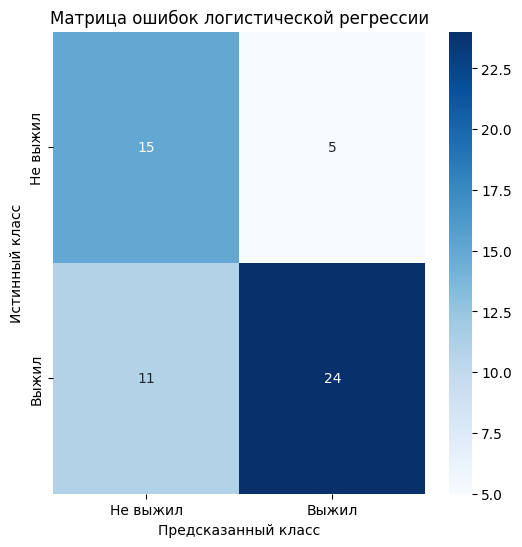

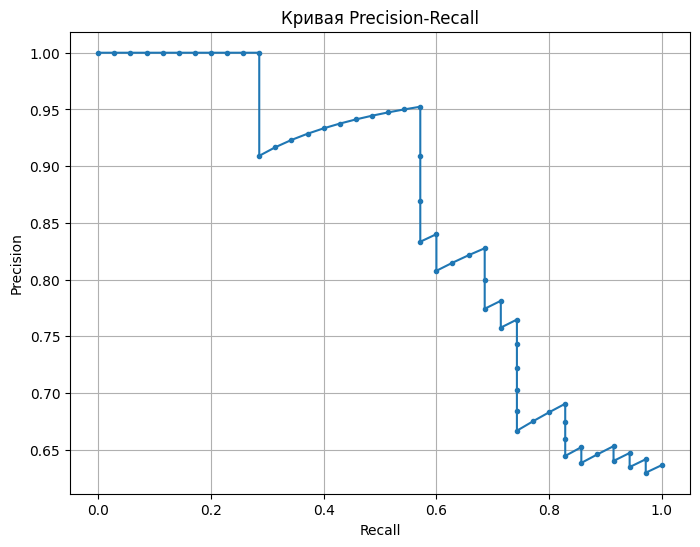

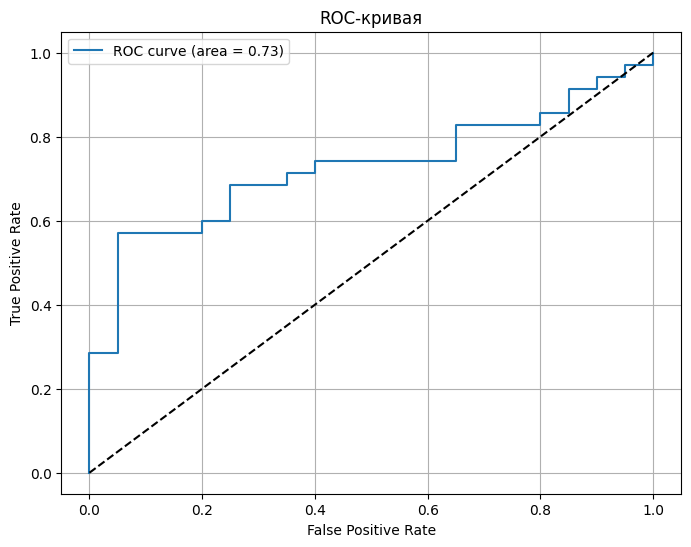

In [9]:
# Базовые метрики
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Матрица ошибок
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Не выжил', 'Выжил'], 
            yticklabels=['Не выжил', 'Выжил'])
plt.title('Матрица ошибок логистической регрессии')
plt.ylabel('Истинный класс')
plt.xlabel('Предсказанный класс')
plt.show()

# Кривая PR
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(recall_vals, precision_vals, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Кривая Precision-Recall')
plt.grid()
plt.show()

# Кривая ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend()
plt.grid()
plt.show()

In [ ]:
Логистическая регрессия показывает стабильные результаты по всем метрикам


Метрики для SVM:
Precision: 0.8621
Recall: 0.7143
F1-score: 0.7812


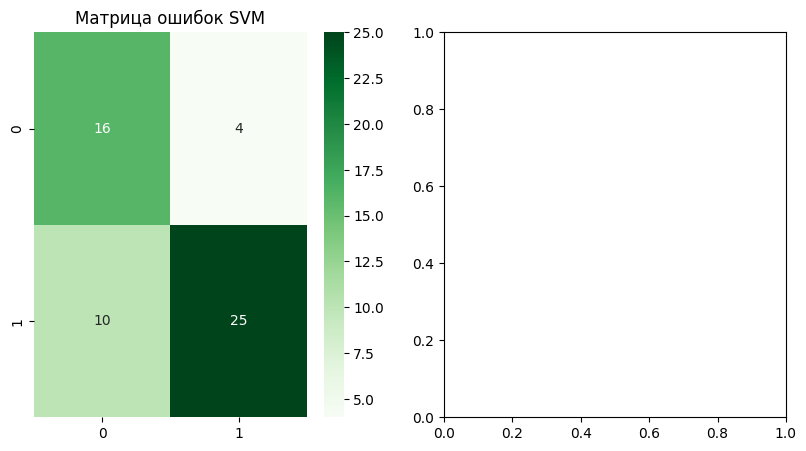

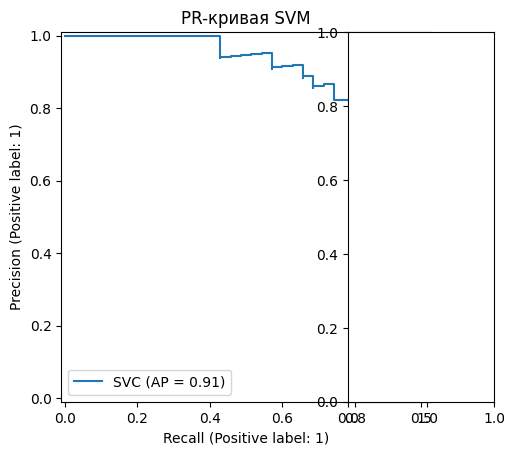

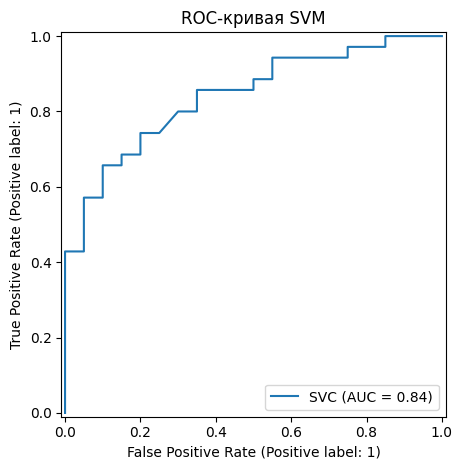

In [10]:
from sklearn.svm import SVC

svm = SVC(probability=True, random_state=42)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)
y_proba_svm = svm.predict_proba(X_test_scaled)[:, 1]

# Метрики для SVM
print("\nМетрики для SVM:")
print(f"Precision: {precision_score(y_test, y_pred_svm):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_svm):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_svm):.4f}")

# Визуализации для SVM
plt.figure(figsize=(15, 5))

# Матрица ошибок
plt.subplot(1, 3, 1)
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens')
plt.title('Матрица ошибок SVM')

# PR-кривая
plt.subplot(1, 3, 2)
PrecisionRecallDisplay.from_estimator(svm, X_test_scaled, y_test)
plt.title('PR-кривая SVM')

# ROC-кривая
plt.subplot(1, 3, 3)
RocCurveDisplay.from_estimator(svm, X_test_scaled, y_test)
plt.title('ROC-кривая SVM')

plt.tight_layout()
plt.show()


Метрики для KNN:
Precision: 0.7838
Recall: 0.8286
F1-score: 0.8056


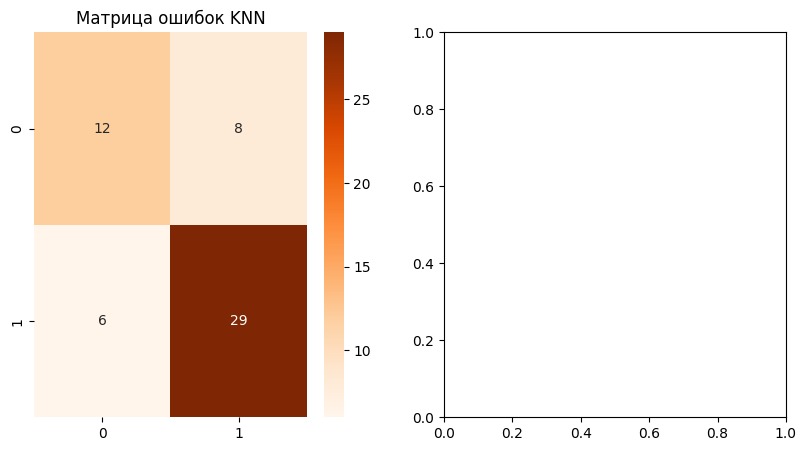

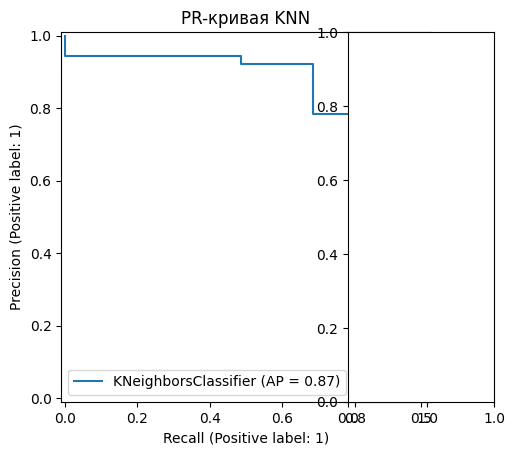

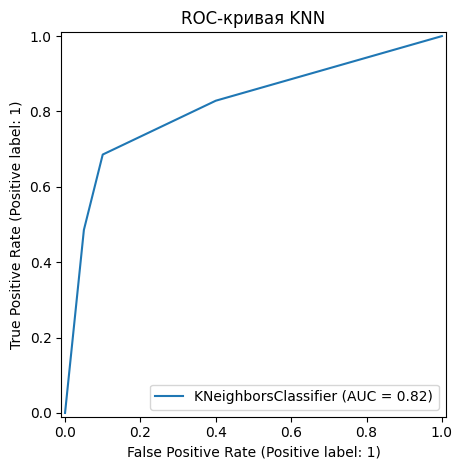

In [11]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
y_proba_knn = knn.predict_proba(X_test_scaled)[:, 1]

# Метрики для KNN
print("\nМетрики для KNN:")
print(f"Precision: {precision_score(y_test, y_pred_knn):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_knn):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_knn):.4f}")

# Визуализации для KNN
plt.figure(figsize=(15, 5))

# Матрица ошибок
plt.subplot(1, 3, 1)
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Oranges')
plt.title('Матрица ошибок KNN')

# PR-кривая
plt.subplot(1, 3, 2)
PrecisionRecallDisplay.from_estimator(knn, X_test_scaled, y_test)
plt.title('PR-кривая KNN')

# ROC-кривая
plt.subplot(1, 3, 3)
RocCurveDisplay.from_estimator(knn, X_test_scaled, y_test)
plt.title('ROC-кривая KNN')

plt.tight_layout()
plt.show()

In [13]:
# Сводная таблица метрик
metrics = {
    'Logistic Regression': {
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1': f1_score(y_test, y_pred),
    },
    'SVM': {
        'Precision': precision_score(y_test, y_pred_svm),
        'Recall': recall_score(y_test, y_pred_svm),
        'F1': f1_score(y_test, y_pred_svm),     
    },
    'KNN': {
        'Precision': precision_score(y_test, y_pred_knn),
        'Recall': recall_score(y_test, y_pred_knn),
        'F1': f1_score(y_test, y_pred_knn),
    }
}

pd.DataFrame(metrics).T.style.background_gradient(cmap='Blues')

,Precision,Recall,F1
Logistic Regression,0.827586,0.685714,0.750000
SVM,0.862069,0.714286,0.781250
KNN,0.783784,0.828571,0.805556


In [ ]:
1.Логистическая регрессия показывает стабильные результаты по всем метрикам
2.SVM - precision довольно высокий, значит когда модель говорит "положительный класс", она почти всегда права. в то же время recall ниже, чем precision, значит модель теряет объекты положительного класса. 
3.KNN - recall довольно высокий, а значит модель ловит почти все объекты положительного класса. Precision ниже, из этого следует, что среди положительных предсказаний часто есть ошибки. Модель ловит почти всё, но делает больше ложных срабатываний.
Лучшей моделью является KNN, так как:
1.Имеет наивысший показатель F1-score (0.806), что указывает на лучший баланс между точностью и полнотой
2.Демонстрирует наивысший Recall (0.829), что важно для задачи выживания пассажиров (лучше предсказать больше выживших)
3.Хотя Precision у KNN немного ниже, чем у других моделей, компромисс в пользу Recall оправдан для данной задачи